In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('Video_Games.csv')

In [4]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

# What were the top 30 games in terms of sales globaly?

In [6]:
topglobal = df[['Name','Platform', 'Global_Sales']].sort_values(by="Global_Sales",ascending=False)

In [7]:
topglobal.head(10)

,Name,Platform,Global_Sales
0,Wii Sports,Wii,82.53
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.52
3,Wii Sports Resort,Wii,32.77
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,29.80
7,Wii Play,Wii,28.92
8,New Super Mario Bros. Wii,Wii,28.32
9,Duck Hunt,NES,28.31


Start with Global Sales

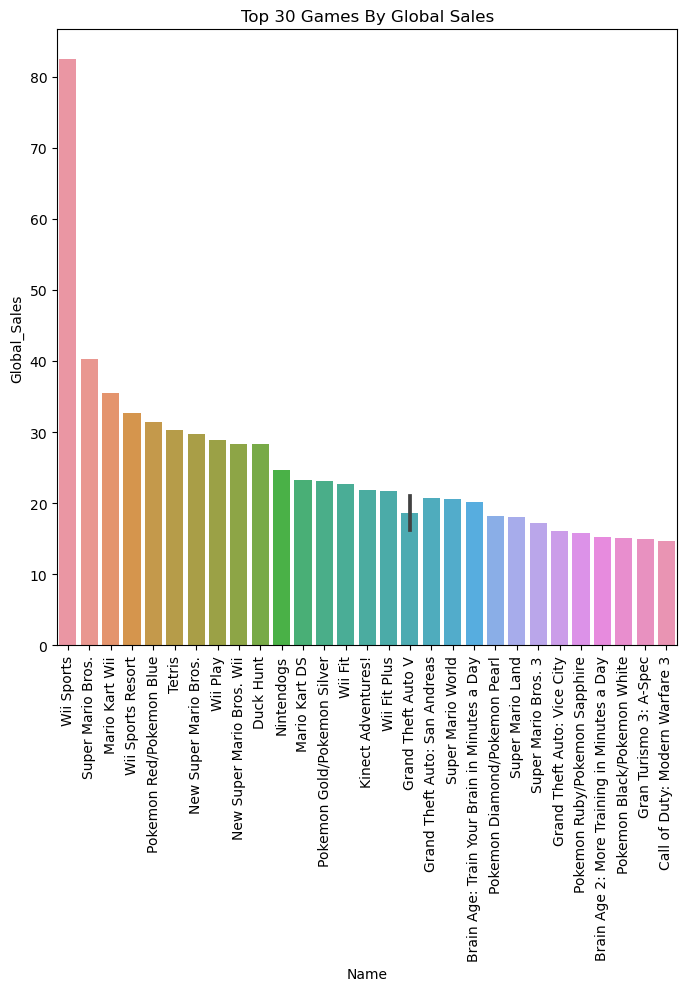

In [8]:
topglobal = topglobal.head(30)
plt.figure(figsize=(8,8))
graph=sns.barplot(y='Global_Sales',x='Name',data=topglobal)
graph.set_title('Top 30 Games By Global Sales')
plt.xticks(rotation=90)
plt.show()

With Global sales, what were the most frequent console within top 30?

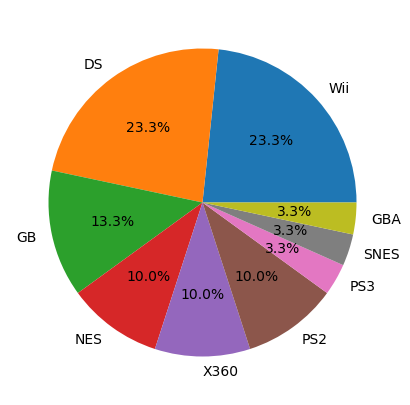

In [9]:
topglobal.Platform.value_counts().plot(kind='pie', figsize=(12,5),autopct='%0.1f%%')
plt.ylabel('')
plt.show()

# Summary of top 30 sales across all places EU, NA, JP and Other (excluding Global)

In [10]:
topeu = df[['Name','Platform', 'EU_Sales']].sort_values(by="EU_Sales",ascending=False)
topeu = topeu.head(30)
topother = df[['Name','Platform', 'Other_Sales']].sort_values(by="Other_Sales",ascending=False)
topother = topother.head(30)
topjap = df[['Name','Platform', 'JP_Sales']].sort_values(by="JP_Sales",ascending=False)
topjap = topjap.head(30)
topna = df[['Name','Platform', 'NA_Sales']].sort_values(by="NA_Sales",ascending=False)
topna = topna.head(30)

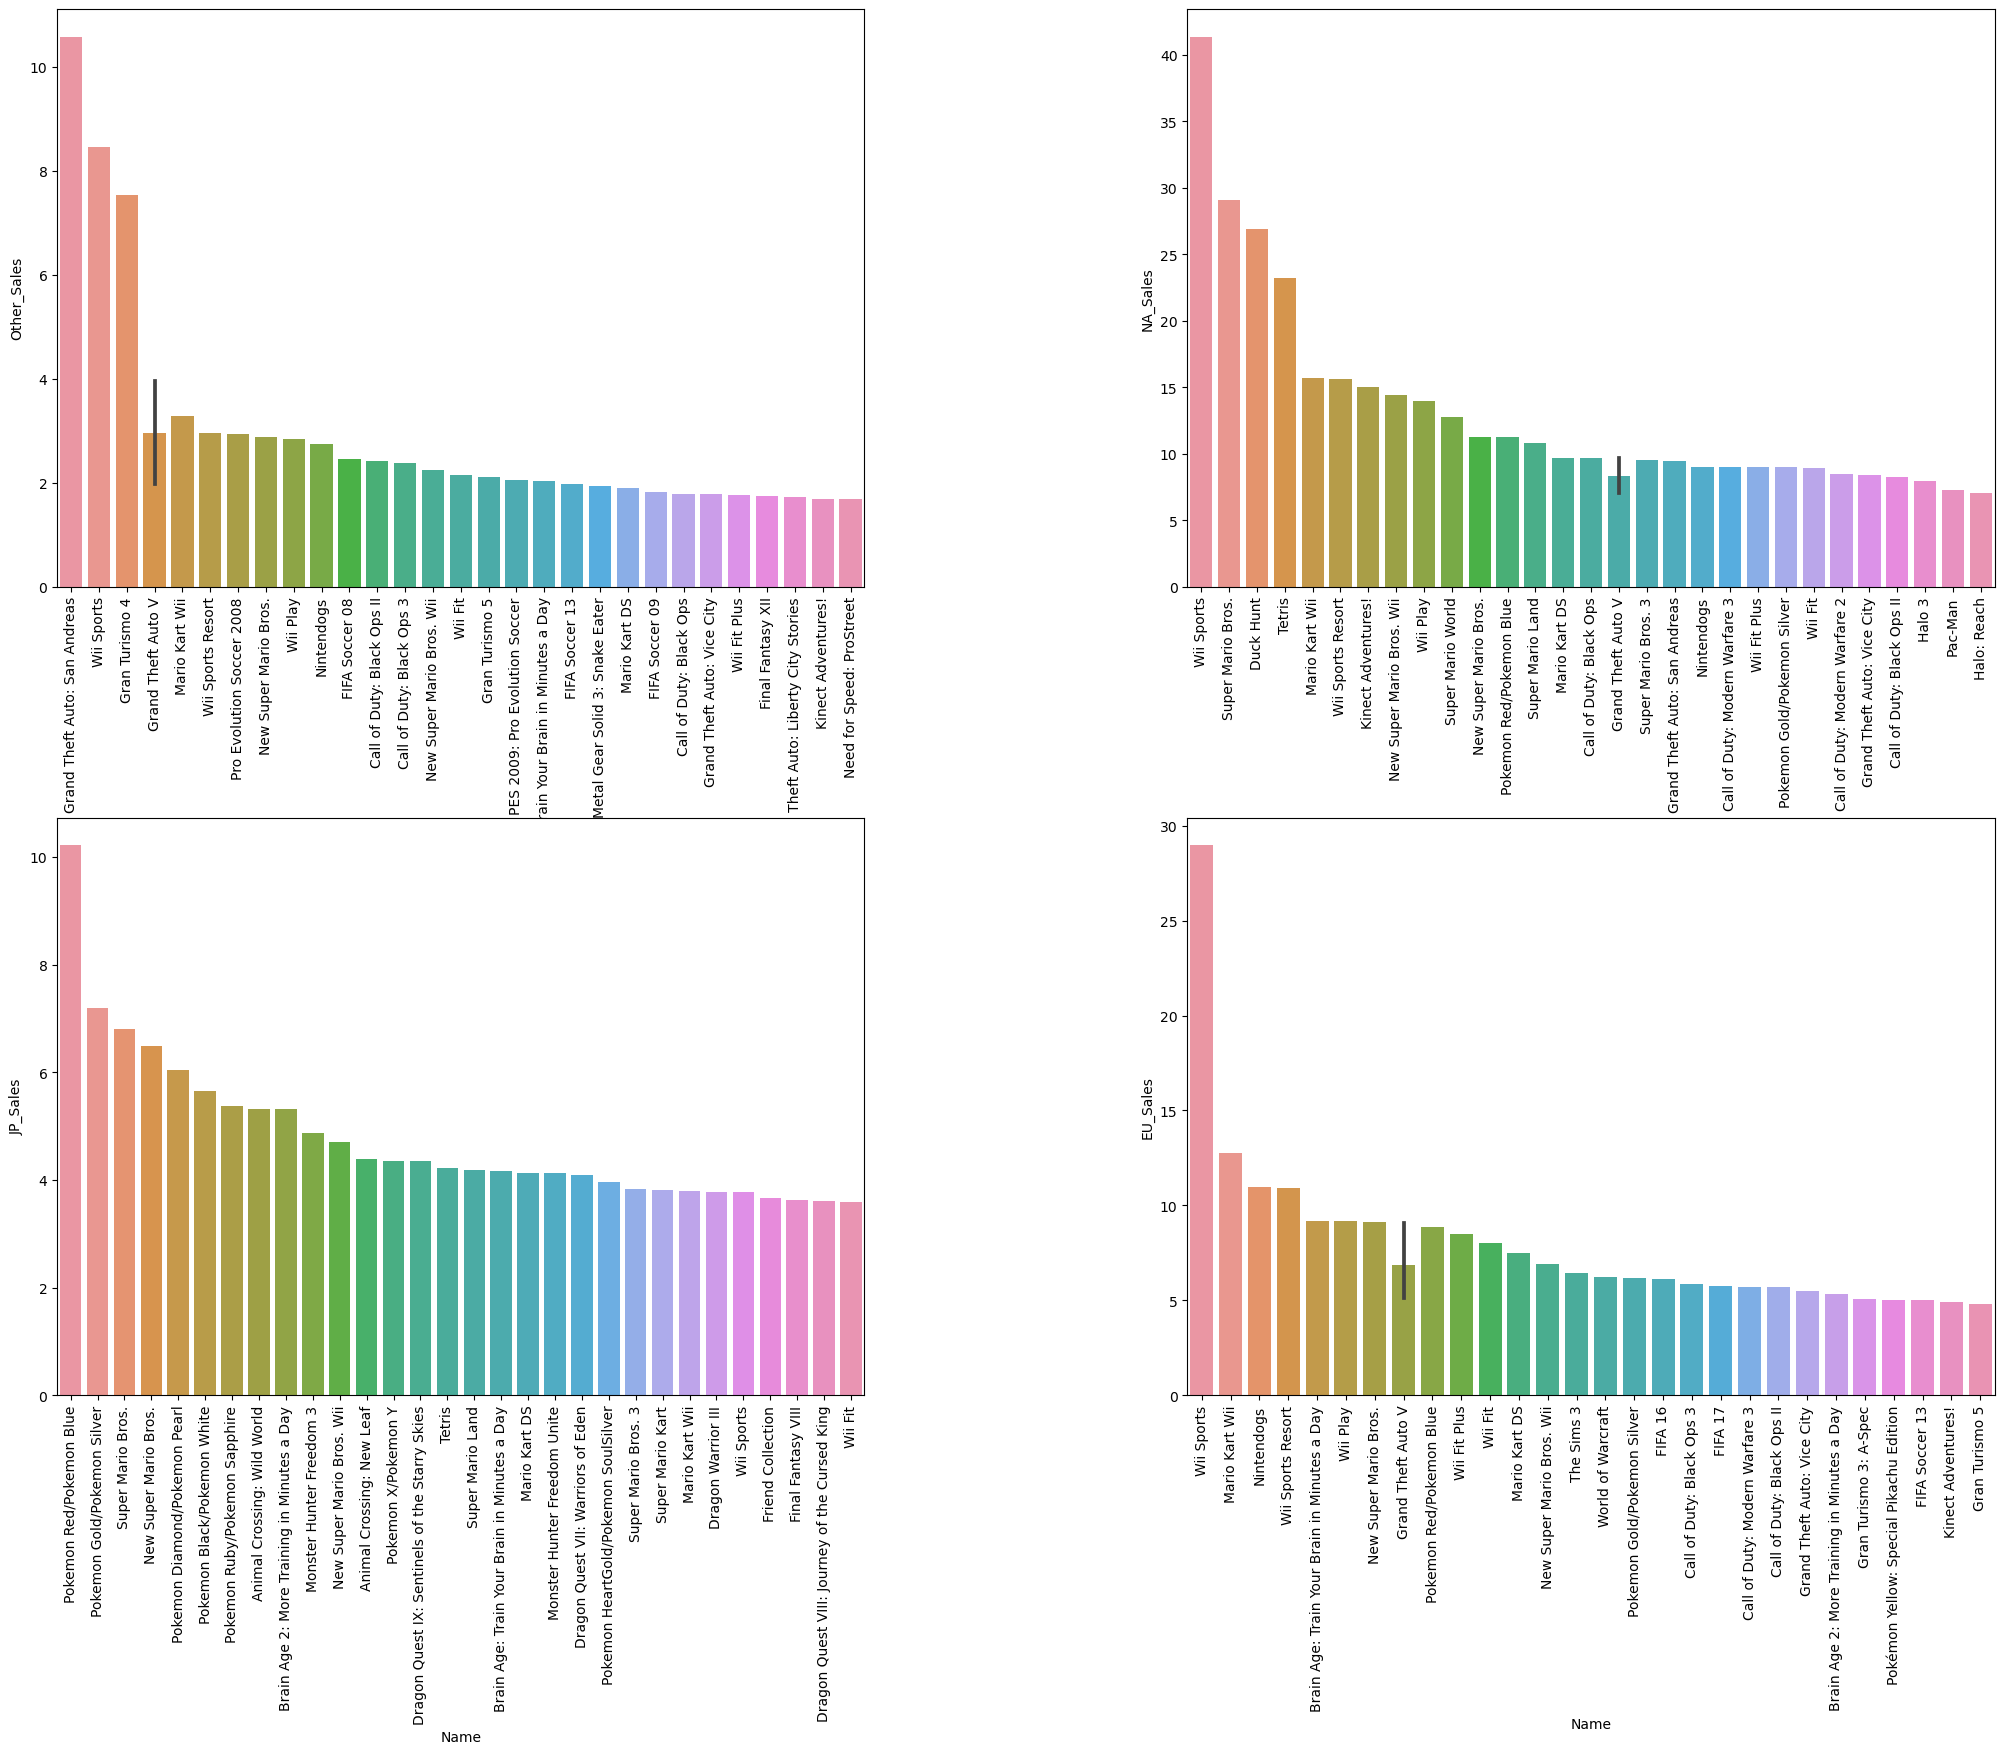

In [11]:
fig, axes = plt.subplots(2, 2, sharey=False, figsize=(25, 18))
sns.barplot(y='NA_Sales',x='Name',data=topna,ax=axes[0, 1])
sns.barplot(y='JP_Sales',x='Name',data=topjap,ax=axes[1, 0])
sns.barplot(y='Other_Sales',x='Name',data=topother,ax=axes[0, 0])
sns.barplot(y='EU_Sales',x='Name',data=topeu,ax=axes[1, 1])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Frequency of Platforms 

In [12]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import plotly.express as px

# Calculate the percentage of games released on each platform
platform_pct = df.Platform.value_counts(normalize=True) * 100

# Create a horizontal bar plot
fig = px.bar(platform_pct, y=platform_pct.index, x=platform_pct.values, orientation='h',
             labels={'x': 'Percentage of games released', 'y': 'Platform'},
             title='Percentage of games released on each platform')

# Show the plot
fig.show()

Frequency of platforms overall (in pecentages)

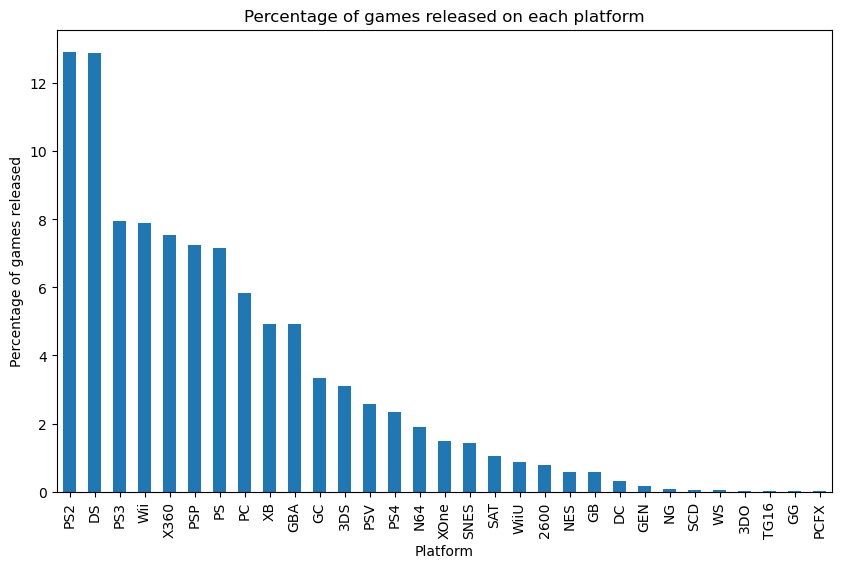

In [14]:
platform_pct = df.Platform.value_counts(normalize=True) * 100
platform_pct.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Platform')
plt.ylabel('Percentage of games released')
plt.title('Percentage of games released on each platform')
plt.show()


In [26]:
import plotly.graph_objects as go
import pandas as pd

# Calculate the number of video game releases per year
year_counts = df.groupby("Year_of_Release").size()

# Create a plotly figure
fig = go.Figure()

# Add a scatter trace
fig.add_trace(go.Scatter(x=year_counts.index, y=year_counts.values, mode='lines'))

# Update the layout
fig.update_layout(title="Number of Video Game Releases per Year",
                  xaxis_title="Year",
                  yaxis_title="Number of Releases",
                  template='plotly_dark')

# Show the plot
fig.show()

# The amount of games released each year

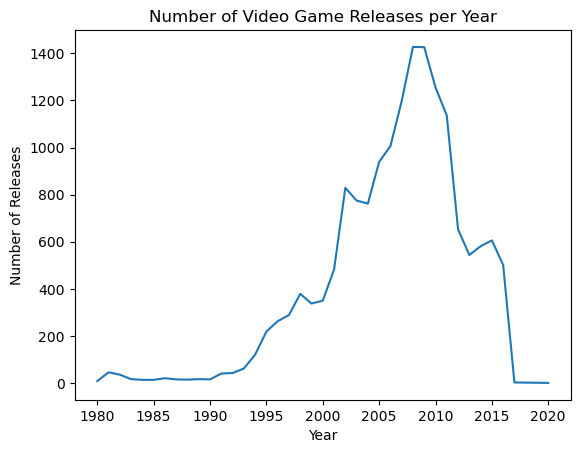

In [16]:
year_counts = df.groupby("Year_of_Release").size()
plt.plot(year_counts.index, year_counts.values)
plt.title("Number of Video Game Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

In [17]:
df_filtered = df[df['Year_of_Release'] >= 2020]

In [18]:
df_filtered.head(100)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


was no data in this dataframe of games recorded past 2020...

# What about Genres and Ratings?

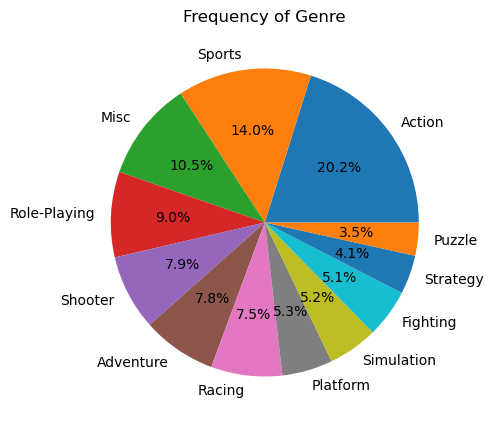

In [19]:
df.Genre.value_counts().plot(kind='pie', figsize=(12,5),autopct='%0.1f%%')
plt.ylabel('')
plt.title("Frequency of Genre")
plt.show()

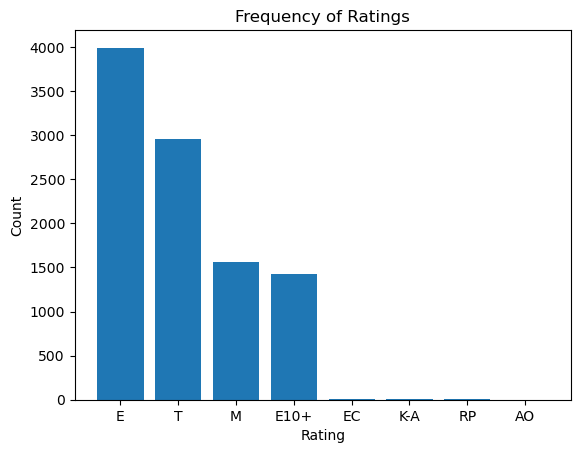

In [20]:
rating = df['Rating'].value_counts()
plt.bar(rating.index, rating.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Frequency of Ratings')
plt.show()

# Still a work in progress..........